    OrderID     Product  Quantity   Price  OrderDate  TotalPrice
0      1001      Laptop         3  982.89 2021-01-01     2948.67
1      1002     Monitor         4  839.33 2021-01-02     3357.32
2      1003      Tablet         4  569.18 2021-01-03     2276.72
3      1004      Laptop         3  824.42 2021-01-04     2473.26
4      1005     Monitor         1  294.62 2021-01-05      294.62
5      1006     Monitor         2  711.94 2021-01-06     1423.88
6      1007     Monitor         2  314.68 2021-01-07      629.36
7      1008     Monitor         2  955.74 2021-01-08     1911.48
8      1009      Tablet         2  617.48 2021-01-09     1234.96
9      1010     Monitor         1  531.73 2021-01-10      531.73
10     1011      Tablet         2  411.64 2021-01-11      823.28
11     1012  SmartPhone         1  819.39 2021-01-12      819.39
12     1013      Laptop         4  564.92 2021-01-13     2259.68
13     1014     Monitor         1  654.75 2021-01-14      654.75
14     1015  SmartPhone  

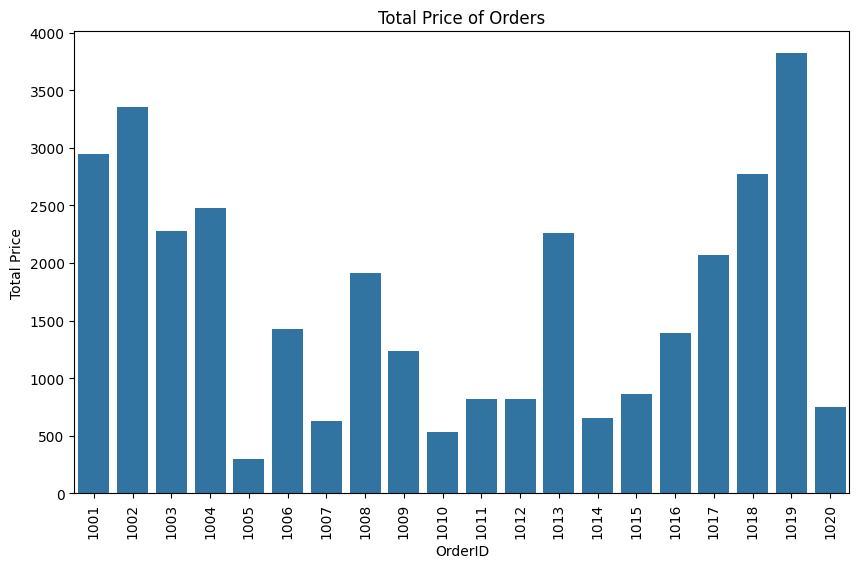

      Product  TotalSales
0      Laptop    13913.07
1     Monitor     8803.14
2  SmartPhone     5499.51
3      Tablet     5080.42


In [40]:
# setting the random seed ensures reproducibility .this means that every time you run a code , you will get the same random numbers,which is useful for debugging and consistent results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

np.random.seed(0)

data={
  'OrderID':np.arange(1001,1021),
  'Product':np.random.choice(['Laptop','Tablet','SmartPhone','Monitor'],size=20),
  'Quantity':np.random.randint(1,5,size=20),
  'Price':np.random.uniform(200,1000,size=20).round(2),
  'OrderDate':pd.date_range(start='2021-01-01',periods=20,freq='D')
}

df=pd.DataFrame(data)
df['TotalPrice']=df['Quantity']*df['Price']
print(df)

plt.figure(figsize=(10,6))
sns.barplot(x='OrderID',y='TotalPrice',data=df)
plt.title('Total Price of Orders')
plt.xlabel('OrderID')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()


# SQL Operations using SQLite
conn = sqlite3.connect('retail.db')

# Load data into SQL tables
df.to_sql('orders', conn, if_exists='replace', index=False)

# Query data using SQL
query = '''
SELECT Product, SUM(TotalPrice) as TotalSales
FROM orders
GROUP BY Product
ORDER BY TotalSales DESC
'''

result = pd.read_sql(query, conn)
print(result)



In [6]:
#first few rows
import pandas as pd
import numpy as np
print(df.head())

   Order_id  Product  Quantity   Price  OrderDate  TotalPrice
0      1001   Laptop         3  982.89 2021-01-01     2948.67
1      1002  Monitor         4  839.33 2021-01-02     3357.32
2      1003   Tablet         4  569.18 2021-01-03     2276.72
3      1004   Laptop         3  824.42 2021-01-04     2473.26
4      1005  Monitor         1  294.62 2021-01-05      294.62


In [7]:
#last few rows
print(df.tail())

    Order_id     Product  Quantity   Price  OrderDate  TotalPrice
15      1016      Laptop         2  694.11 2021-01-16     1388.22
16      1017      Laptop         3  689.68 2021-01-17     2069.04
17      1018      Laptop         4  693.55 2021-01-18     2774.20
18      1019  SmartPhone         4  955.00 2021-01-19     3820.00
19      1020      Tablet         1  745.46 2021-01-20      745.46


In [8]:
#display summary statistics
print(df.describe())

         Order_id   Quantity      Price            OrderDate   TotalPrice
count    20.00000  20.000000   20.00000                   20    20.000000
mean   1010.50000   2.500000  654.27700  2021-01-10 12:00:00  1664.807000
min    1001.00000   1.000000  215.03000  2021-01-01 00:00:00   294.620000
25%    1005.75000   1.750000  556.62250  2021-01-05 18:00:00   800.907500
50%    1010.50000   2.000000  691.61500  2021-01-10 12:00:00  1406.050000
75%    1015.25000   4.000000  820.64750  2021-01-15 06:00:00  2325.855000
max    1020.00000   4.000000  982.89000  2021-01-20 00:00:00  3820.000000
std       5.91608   1.192079  220.50972                  NaN  1038.299408


In [9]:
#checking the missing values
print(df.isnull().sum())

Order_id      0
Product       0
Quantity      0
Price         0
OrderDate     0
TotalPrice    0
dtype: int64


In [10]:
#select a single column
print(df['Product'])

0         Laptop
1        Monitor
2         Tablet
3         Laptop
4        Monitor
5        Monitor
6        Monitor
7        Monitor
8         Tablet
9        Monitor
10        Tablet
11    SmartPhone
12        Laptop
13       Monitor
14    SmartPhone
15        Laptop
16        Laptop
17        Laptop
18    SmartPhone
19        Tablet
Name: Product, dtype: object


In [11]:
#select multiple columns
print(df[['Product','Quantity']])

       Product  Quantity
0       Laptop         3
1      Monitor         4
2       Tablet         4
3       Laptop         3
4      Monitor         1
5      Monitor         2
6      Monitor         2
7      Monitor         2
8       Tablet         2
9      Monitor         1
10      Tablet         2
11  SmartPhone         1
12      Laptop         4
13     Monitor         1
14  SmartPhone         4
15      Laptop         2
16      Laptop         3
17      Laptop         4
18  SmartPhone         4
19      Tablet         1


In [12]:
#filter rows where Quantity is greater than 2
filter_df=df[df['Quantity']>2]
print(filter_df)

    Order_id     Product  Quantity   Price  OrderDate  TotalPrice
0       1001      Laptop         3  982.89 2021-01-01     2948.67
1       1002     Monitor         4  839.33 2021-01-02     3357.32
2       1003      Tablet         4  569.18 2021-01-03     2276.72
3       1004      Laptop         3  824.42 2021-01-04     2473.26
12      1013      Laptop         4  564.92 2021-01-13     2259.68
14      1015  SmartPhone         4  215.03 2021-01-15      860.12
16      1017      Laptop         3  689.68 2021-01-17     2069.04
17      1018      Laptop         4  693.55 2021-01-18     2774.20
18      1019  SmartPhone         4  955.00 2021-01-19     3820.00


In [13]:
#group by product and calculate total quantity sold
grouped_df=df.groupby('Product')['Quantity'].sum()
print(grouped_df)

Product
Laptop        19
Monitor       13
SmartPhone     9
Tablet         9
Name: Quantity, dtype: int32


In [14]:
#calculate the average price per product
avg_price=df.groupby('Product')['Price'].mean()
print(avg_price)

Product
Laptop        741.595000
Monitor       614.684286
SmartPhone    663.140000
Tablet        585.940000
Name: Price, dtype: float64


In [16]:
avg_price=df.groupby('Product')['Price'].max()
print(avg_price)

Product
Laptop        982.89
Monitor       955.74
SmartPhone    955.00
Tablet        745.46
Name: Price, dtype: float64


In [19]:
#introduce some NaN values
df.loc[5:7,'Price']=np.nan

In [20]:
#fill NaN values with the mean price
df['Price'].fillna(df['Price'].mean(),inplace=True)

C:\Users\sumit\AppData\Local\Temp\ipykernel_13468\1107667335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(),inplace=True)


In [21]:
df_cleaned=df.dropna()
print(df_cleaned)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice
0       1001      Laptop         3  982.890000 2021-01-01     2948.67
1       1002     Monitor         4  839.330000 2021-01-02     3357.32
2       1003      Tablet         4  569.180000 2021-01-03     2276.72
3       1004      Laptop         3  824.420000 2021-01-04     2473.26
4       1005     Monitor         1  294.620000 2021-01-05      294.62
5       1006     Monitor         2  653.128235 2021-01-06     1423.88
6       1007     Monitor         2  653.128235 2021-01-07      629.36
7       1008     Monitor         2  653.128235 2021-01-08     1911.48
8       1009      Tablet         2  617.480000 2021-01-09     1234.96
9       1010     Monitor         1  531.730000 2021-01-10      531.73
10      1011      Tablet         2  411.640000 2021-01-11      823.28
11      1012  SmartPhone         1  819.390000 2021-01-12      819.39
12      1013      Laptop         4  564.920000 2021-01-13     2259.68
13      1014     Mon

In [22]:
data2={
  'Product':['Laptop','Tablet','SmartPhone','Monitor'],
  'Category':['Electronics','Electronics','Electronics','Peripherals']
}

df2=pd.DataFrame(data2)

#Merge the DataFrames on Product

merged_df=pd.merge(df,df2,on='Product')
print(merged_df)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  \
0       1001      Laptop         3  982.890000 2021-01-01     2948.67   
1       1002     Monitor         4  839.330000 2021-01-02     3357.32   
2       1003      Tablet         4  569.180000 2021-01-03     2276.72   
3       1004      Laptop         3  824.420000 2021-01-04     2473.26   
4       1005     Monitor         1  294.620000 2021-01-05      294.62   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88   
6       1007     Monitor         2  653.128235 2021-01-07      629.36   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48   
8       1009      Tablet         2  617.480000 2021-01-09     1234.96   
9       1010     Monitor         1  531.730000 2021-01-10      531.73   
10      1011      Tablet         2  411.640000 2021-01-11      823.28   
11      1012  SmartPhone         1  819.390000 2021-01-12      819.39   
12      1013      Laptop         4  564.920000 2021

In [23]:
#convert a column to datetime
df['OrderDate']=pd.to_datetime(df['OrderDate'])


#Extract year ,month and day from the datetime column
df['Year']=df['OrderDate'].dt.year
df['Month']=df['OrderDate'].dt.month
df['Day']=df['OrderDate'].dt.day

print(df)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  Year  \
0       1001      Laptop         3  982.890000 2021-01-01     2948.67  2021   
1       1002     Monitor         4  839.330000 2021-01-02     3357.32  2021   
2       1003      Tablet         4  569.180000 2021-01-03     2276.72  2021   
3       1004      Laptop         3  824.420000 2021-01-04     2473.26  2021   
4       1005     Monitor         1  294.620000 2021-01-05      294.62  2021   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88  2021   
6       1007     Monitor         2  653.128235 2021-01-07      629.36  2021   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48  2021   
8       1009      Tablet         2  617.480000 2021-01-09     1234.96  2021   
9       1010     Monitor         1  531.730000 2021-01-10      531.73  2021   
10      1011      Tablet         2  411.640000 2021-01-11      823.28  2021   
11      1012  SmartPhone         1  819.390000 2021-

In [24]:
pivot_table=pd.pivot_table(df,values='TotalPrice',index='Product',columns='Month',aggfunc=np.sum)
print(pivot_table)

Month              1
Product             
Laptop      13913.07
Monitor      8803.14
SmartPhone   5499.51
Tablet       5080.42


C:\Users\sumit\AppData\Local\Temp\ipykernel_13468\2098153687.py:1: FutureWarning: The provided callable <function sum at 0x0000018A10EC3240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(df,values='TotalPrice',index='Product',columns='Month',aggfunc=np.sum)


In [30]:
#Define a custom function

def discount(price):
  return round(price*0.9,2)


#applying the function to the 'Price' column
df['DiscountedPrice']=df['Price'].apply(discount)
print(df)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  Year  \
0       1001      Laptop         3  982.890000 2021-01-01     2948.67  2021   
1       1002     Monitor         4  839.330000 2021-01-02     3357.32  2021   
2       1003      Tablet         4  569.180000 2021-01-03     2276.72  2021   
3       1004      Laptop         3  824.420000 2021-01-04     2473.26  2021   
4       1005     Monitor         1  294.620000 2021-01-05      294.62  2021   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88  2021   
6       1007     Monitor         2  653.128235 2021-01-07      629.36  2021   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48  2021   
8       1009      Tablet         2  617.480000 2021-01-09     1234.96  2021   
9       1010     Monitor         1  531.730000 2021-01-10      531.73  2021   
10      1011      Tablet         2  411.640000 2021-01-11      823.28  2021   
11      1012  SmartPhone         1  819.390000 2021-

In [31]:
#merged_df=pd.merge(df1,df2,on='key',how='inner')
#merge():combines DataFrames based on common columns or indices ,similar to sql join (inner,outer,left,right)
#join():combines DataFrames based on there indices .it is convenient method for combining columns from different DatFrame
#joined_df=df1.join(df2,how='left')
#concat():Concatenates DataFrames along a particular axis(0=row,1=column).it can be used to append DataFrames or combine them by side

#concatenated_df=pd.concat([df1,df2],axis=0)#append rows
#concatenated_df=pd.concat([df1,df2],axis=1) #combine columns


In [32]:
#how do you handle categorical data in pandas
df['Product']=pd.Categorical(df['Product'])

#create dummy variables
dummies=pd.get_dummies(df['Product'])
df=pd.concat([df,dummies],axis=1)
print(df)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  Year  \
0       1001      Laptop         3  982.890000 2021-01-01     2948.67  2021   
1       1002     Monitor         4  839.330000 2021-01-02     3357.32  2021   
2       1003      Tablet         4  569.180000 2021-01-03     2276.72  2021   
3       1004      Laptop         3  824.420000 2021-01-04     2473.26  2021   
4       1005     Monitor         1  294.620000 2021-01-05      294.62  2021   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88  2021   
6       1007     Monitor         2  653.128235 2021-01-07      629.36  2021   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48  2021   
8       1009      Tablet         2  617.480000 2021-01-09     1234.96  2021   
9       1010     Monitor         1  531.730000 2021-01-10      531.73  2021   
10      1011      Tablet         2  411.640000 2021-01-11      823.28  2021   
11      1012  SmartPhone         1  819.390000 2021-

In [33]:
#how to improve the performance of pandas operations on large datasets?
# use efficient datatypes:convert columns to appropriate types(eg.'category','int32','float32')
# vectorized operations: Avoid loops and use vectorized operations for faster computation
# chunking:process data in chunks to reduce memory usage
# dask:use dask, a parallel computing libraries that extend pandas for larger than memory management

In [34]:
df['Quantity']=df['Quantity'].astype('int32')
df['Price']=df['Price'].astype('float32')

In [35]:
#what are some Techniques for dealing with imbalanced datasets?
# Resampling: use oversampling(eg. SMOTE)or undersampling to balance the classes
# Class Weights :Use class weights in your model to give more importance to the minority class
# Anomaly detection: Treat the minority class as anomly and use anomly detections algorithm

In [36]:
#example of using class weights in scikit-learn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced')

In [37]:
# Window function in pandas:allows to perform operations over a sliding window of data , which is useful for time series analysis
df['RollingMeanPrice']=df['Price'].rolling(window=3).mean()
print(df)

    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  Year  \
0       1001      Laptop         3  982.890015 2021-01-01     2948.67  2021   
1       1002     Monitor         4  839.330017 2021-01-02     3357.32  2021   
2       1003      Tablet         4  569.179993 2021-01-03     2276.72  2021   
3       1004      Laptop         3  824.419983 2021-01-04     2473.26  2021   
4       1005     Monitor         1  294.619995 2021-01-05      294.62  2021   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88  2021   
6       1007     Monitor         2  653.128235 2021-01-07      629.36  2021   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48  2021   
8       1009      Tablet         2  617.479980 2021-01-09     1234.96  2021   
9       1010     Monitor         1  531.729980 2021-01-10      531.73  2021   
10      1011      Tablet         2  411.640015 2021-01-11      823.28  2021   
11      1012  SmartPhone         1  819.390015 2021-

In [38]:
#drop columns
column_after='DiscountedPrice'
columns=df.columns.tolist()
position=columns.index(column_after)
columns_to_drop=columns[position+1:] #all the columns after c
df_dropped=df.drop(columns=columns_to_drop)
print("\nDataFrame after dropping columns after DiscountedPrice :")
print(df_dropped)


DataFrame after dropping columns after DiscountedPrice :
    Order_id     Product  Quantity       Price  OrderDate  TotalPrice  Year  \
0       1001      Laptop         3  982.890015 2021-01-01     2948.67  2021   
1       1002     Monitor         4  839.330017 2021-01-02     3357.32  2021   
2       1003      Tablet         4  569.179993 2021-01-03     2276.72  2021   
3       1004      Laptop         3  824.419983 2021-01-04     2473.26  2021   
4       1005     Monitor         1  294.619995 2021-01-05      294.62  2021   
5       1006     Monitor         2  653.128235 2021-01-06     1423.88  2021   
6       1007     Monitor         2  653.128235 2021-01-07      629.36  2021   
7       1008     Monitor         2  653.128235 2021-01-08     1911.48  2021   
8       1009      Tablet         2  617.479980 2021-01-09     1234.96  2021   
9       1010     Monitor         1  531.729980 2021-01-10      531.73  2021   
10      1011      Tablet         2  411.640015 2021-01-11      823.28  20